In [27]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier


In [5]:
#importing the data set
df=pd.read_csv("./creditcard.csv")

In [6]:
#creating target series
target=df['Class']
target

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [ ]:
#dropping the target variable from the data set
df.drop('Class',axis=1,inplace=True)
df.shape

In [ ]:
#converting them to numpy arrays
X=np.array(df)
y=np.array(target)
X.shape
y.shape

In [ ]:
#distribution of the target variable
len(y[y==1])
len(y[y==0])

In [10]:
#splitting the data set into train and test (80:20)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(227845, 30) (56962, 30) (227845,) (56962,)


In [13]:
#applyting SMOTE to oversample the minority class
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=2)
X_sm,y_sm=sm.fit_sample(X_train,y_train)
print(X_sm.shape,y_sm.shape)
print(len(y_sm[y_sm==1]),len(y_sm[y_sm==0]))

(454880, 30) (454880,)
227440 227440


In [15]:
#Logistic Regression
logreg=LogisticRegression()
logreg.fit(X_sm,y_sm)
y_logreg=logreg.predict(X_test)
y_logreg_prob=logreg.predict_proba(X_test)[:,1]

In [16]:
#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_logreg))
print("Accuracy:\n",metrics.accuracy_score(y_test,y_logreg))
print("Precision:\n",metrics.precision_score(y_test,y_logreg))
print("Recall:\n",metrics.recall_score(y_test,y_logreg))
print("AUC:\n",metrics.roc_auc_score(y_test,y_logreg_prob))
auc=metrics.roc_auc_score(y_test,y_logreg_prob)

Confusion Matrix:
 [[55905   970]
 [   15    72]]
Accuracy:
 0.9827077700923422
Precision:
 0.0690978886756238
Recall:
 0.8275862068965517
AUC:
 0.9550223569533915


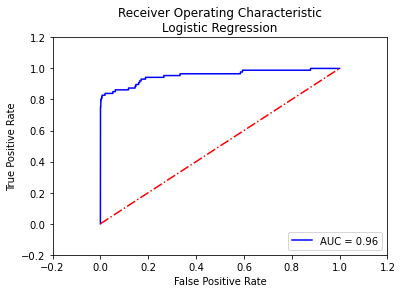

In [18]:
#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_logreg_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nLogistic Regression')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [20]:
#K Nearest Neighbors
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_sm,y_sm)
y_knn=knn.predict(X_test)
y_knn_prob=knn.predict_proba(X_test)[:,1]

In [21]:
#metrics evaluation
print(metrics.confusion_matrix(y_test,y_knn))
print(metrics.accuracy_score(y_test,y_knn))
print(metrics.precision_score(y_test,y_knn))
print(metrics.recall_score(y_test,y_knn))
print(metrics.roc_auc_score(y_test,y_knn_prob))

[[53939  2936]
 [   46    41]]
0.94764931006636
0.013772253946926436
0.47126436781609193
0.726459921687508


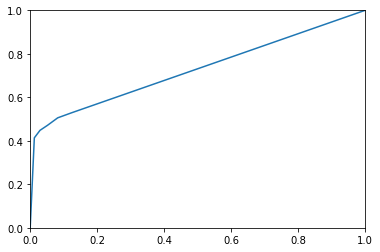

In [22]:
#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_knn_prob)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.show()

In [24]:
#Random Forest

rf=RandomForestClassifier(random_state=3)
rf.fit(X_sm,y_sm)
y_rf=rf.predict(X_test)
y_rf_prob=rf.predict_proba(X_test)[:,1]

In [25]:
#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_rf))
print("Accuracy:\n",metrics.accuracy_score(y_test,y_rf))
print("Precision:\n",metrics.precision_score(y_test,y_rf))
print("Recall:\n",metrics.recall_score(y_test,y_rf))
print("AUC:\n",metrics.roc_auc_score(y_test,y_rf_prob))
auc=metrics.roc_auc_score(y_test,y_rf_prob)

Confusion Matrix:
 [[56865    10]
 [   18    69]]
Accuracy:
 0.9995084442259752
Precision:
 0.8734177215189873
Recall:
 0.7931034482758621
AUC:
 0.9639779714538335


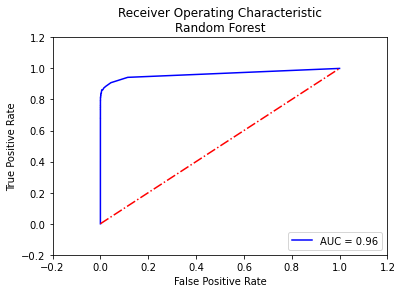

In [26]:
#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_rf_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [28]:
#Random Forest

rf=RandomForestClassifier(criterion='entropy',random_state=3)
rf.fit(X_sm,y_sm)
y_rf=rf.predict(X_test)
y_rf_prob=rf.predict_proba(X_test)[:,1]

In [29]:
#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_rf))
print("Accuracy:\n",metrics.accuracy_score(y_test,y_rf))
print("Precision:\n",metrics.precision_score(y_test,y_rf))
print("Recall:\n",metrics.recall_score(y_test,y_rf))
print("AUC:\n",metrics.roc_auc_score(y_test,y_rf_prob))
auc=metrics.roc_auc_score(y_test,y_rf_prob)

Confusion Matrix:
 [[56863    12]
 [   18    69]]
Accuracy:
 0.9994733330992591
Precision:
 0.8518518518518519
Recall:
 0.7931034482758621
AUC:
 0.9649199444233927


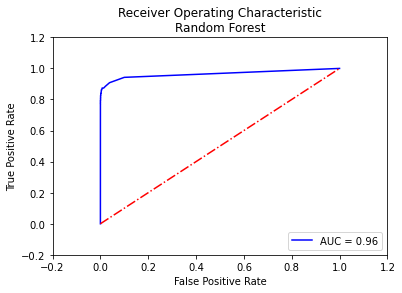

In [30]:
#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_rf_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()